In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train= pd.read_csv("../dataset/processed/train.csv", parse_dates=['Date'])
test= pd.read_csv("../dataset/processed/test.csv", parse_dates=['Date'])

In [3]:
train = train.drop(columns=["Commodity"])
test = test.drop(columns=["Commodity"])

In [4]:
df = pd.read_csv("../dataset/processed/train.csv", parse_dates=['Date'])


In [5]:
df = df.drop(columns=["Commodity"])

In [6]:
df.head()

,Date,Price,Item
0,2013-06-16,37.5,122
1,2013-06-16,29.0,124
2,2013-06-16,20.5,96
3,2013-06-16,15.5,99
4,2013-06-16,29.0,83


In [7]:
df.tail()

,Date,Price,Item
157434,2019-12-31,215.0,51
157435,2019-12-31,287.5,46
157436,2019-12-31,222.5,43
157437,2019-12-31,212.5,44
157438,2019-12-31,242.5,45


In [8]:
train.head()

,Date,Price,Item
0,2013-06-16,37.5,122
1,2013-06-16,29.0,124
2,2013-06-16,20.5,96
3,2013-06-16,15.5,99
4,2013-06-16,29.0,83


In [9]:
train.tail()

,Date,Price,Item
157434,2019-12-31,215.0,51
157435,2019-12-31,287.5,46
157436,2019-12-31,222.5,43
157437,2019-12-31,212.5,44
157438,2019-12-31,242.5,45


In [10]:
test.tail()

,Date,Price,Item
39717,2021-05-13,110.0,51
39718,2021-05-13,275.0,46
39719,2021-05-13,230.0,43
39720,2021-05-13,225.0,44
39721,2021-05-13,245.0,45


In [11]:
test.head()

,Date,Price,Item
0,2020-01-01,62.5,122
1,2020-01-01,62.5,121
2,2020-01-01,40.0,124
3,2020-01-01,40.0,126
4,2020-01-01,42.5,123


In [12]:
# train = train.drop(columns=["Commodity"])
# train.head()

DIfferential Transformation

In [13]:

import datetime

In [14]:
## checking trend / seasonality

def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.lineplot(x=x_col, y=y_col, data=data, ax=ax, color='mediumblue', label='Total Price')  # plot total price over time
    
    second = data.groupby(data[x_col].dt.year)[y_col].mean().reset_index()  # plot mean price over time
    second[x_col] = pd.to_datetime(second[x_col], format='%Y')
    second[x_col] += pd.DateOffset(months=6)
    sns.lineplot(x=x_col, y=y_col, data=second, ax=ax, color='red', label='Mean Price')
    
    ax.set(xlabel="Date", ylabel="Price", title=title)
    sns.despine()

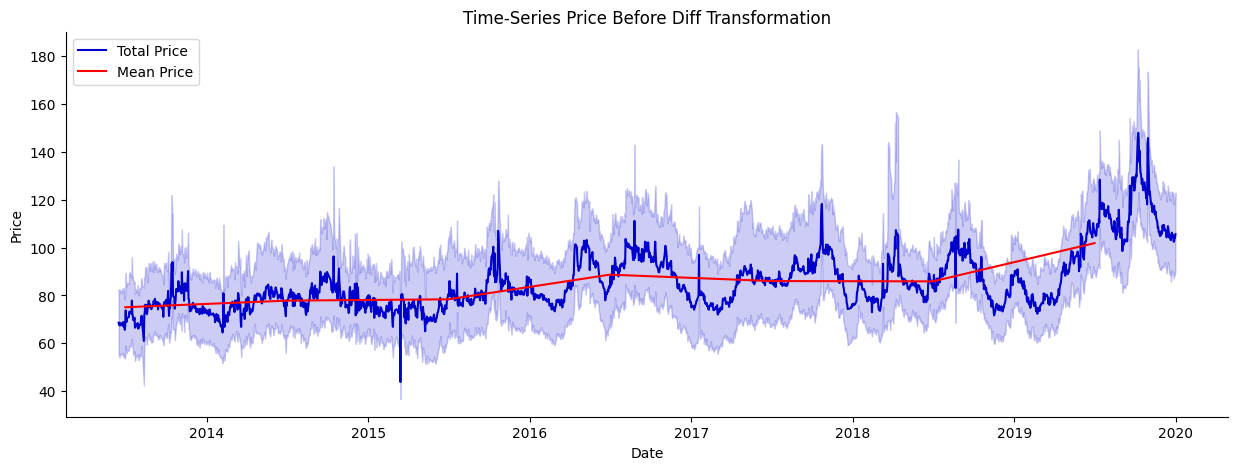

In [15]:
time_plot(train, 'Date', 'Price', 'Time-Series Price Before Diff Transformation')

In [16]:
"""Clearer Signal: 
Identifying and removing the seasonal component from the time series can result in a clearer relationship 
between input and output variables."""

def get_diff(data):
    data['price_diff'] = data.Price.diff()
    data = data.dropna()
    
    data.to_csv('stationary.csv')
    return data

In [17]:

stationary = get_diff(train)

In [18]:

stationary.tail()

,Date,Price,Item,price_diff
157434,2019-12-31,215.0,51,0.0
157435,2019-12-31,287.5,46,72.5
157436,2019-12-31,222.5,43,-65.0
157437,2019-12-31,212.5,44,-10.0
157438,2019-12-31,242.5,45,30.0


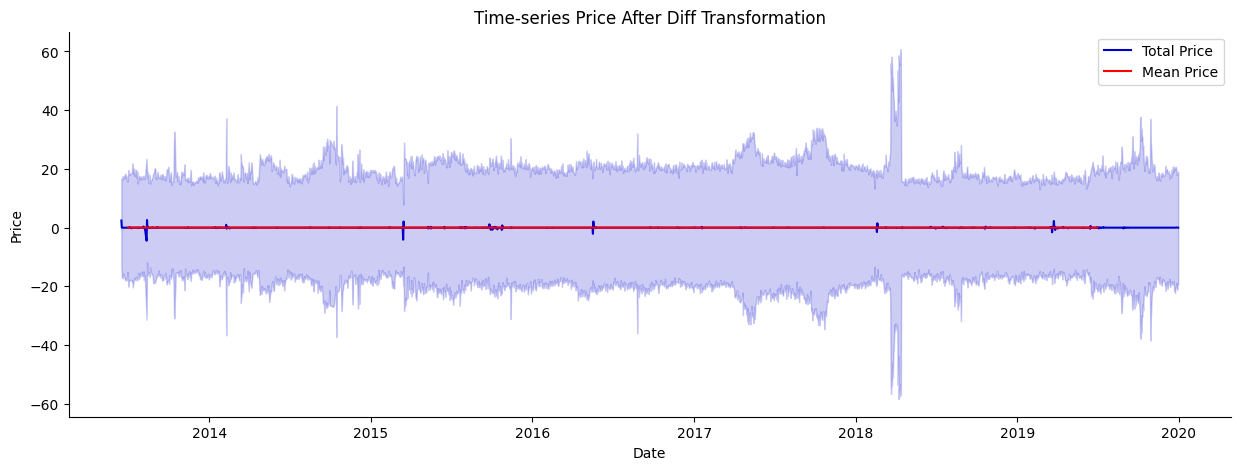

In [19]:
time_plot(stationary, 'Date', 'price_diff', 'Time-series Price After Diff Transformation')

In [20]:
#1 Time-related feature == creating time related features

def create_date_features(df):
    df['month'] = df.Date.dt.month
    df['day_of_month'] = df.Date.dt.day
    df['day_of_year'] = df.Date.dt.dayofyear
    # df['week_of_year'] = df.Date.dt.weekofyear
    df['day_of_week'] = df.Date.dt.dayofweek + 1
    df['year'] = df.Date.dt.year
    df["is_wknd"] = df.Date.dt.weekday // 4   ### df.date.dt.weekday => Starts from '0' means '0' = 'Monday'. 
                                               ##So, '// 4' will give '1' when day number equals
                                            ## so does for 5 and 6 gives '1' for //4
    df['is_month_start'] = df.Date.dt.is_month_start.astype(int)
    df['is_month_end'] = df.Date.dt.is_month_end.astype(int)
    df['is_year_start'] = df.Date.dt.is_year_start.astype(int)
    df['is_year_end'] = df.Date.dt.is_year_end.astype(int)
    return df
df = create_date_features(stationary)

C:\Users\User\AppData\Local\Temp\ipykernel_1828\2339711449.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.Date.dt.month
C:\Users\User\AppData\Local\Temp\ipykernel_1828\2339711449.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_month'] = df.Date.dt.day
C:\Users\User\AppData\Local\Temp\ipykernel_1828\2339711449.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [21]:

df.tail()

,Date,Price,Item,price_diff,month,day_of_month,day_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end,is_year_start,is_year_end
157434,2019-12-31,215.0,51,0.0,12,31,365,2,2019,0,0,1,0,1
157435,2019-12-31,287.5,46,72.5,12,31,365,2,2019,0,0,1,0,1
157436,2019-12-31,222.5,43,-65.0,12,31,365,2,2019,0,0,1,0,1
157437,2019-12-31,212.5,44,-10.0,12,31,365,2,2019,0,0,1,0,1
157438,2019-12-31,242.5,45,30.0,12,31,365,2,2019,0,0,1,0,1


In [22]:
import numpy as np

In [23]:
#2 Lag/Shifted Features
#==> 1. every feature should be sorted 
#==> 2. generate new features for each 'item' in each 'store' according to 'date' order

#to sort 
df.sort_values(by=['Item', 'Date'], axis=0, inplace=True)

#lagging ==> how many sales 1 day before in column "lag1" and so on
"""but here new features are being generated using target variable= sales 
and since target variable is being used == data leakage is possible / overfitteing of data ==> machine loses generalization ability
so adding random noise"""



#lagging 
def lag_features(dataframe, lags):
    for lag in lags:
        dataframe['sales_lag_' + str(lag)] = dataframe.groupby(["Item"])['price_diff'].transform(
            lambda x: x.shift(lag)) + random_noise(dataframe) # Adding random noise to each value.
    return dataframe

#random noise
def random_noise(dataframe):
    return np.random.normal(scale=1.6, size=(len(dataframe),))

# passing variables and creating feature
lags_list = [91, 98, 105, 112, 119, 126, 182, 364, 546, 728] 
df = lag_features(df, lags_list)

C:\Users\User\AppData\Local\Temp\ipykernel_1828\1690213432.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['Item', 'Date'], axis=0, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1828\1690213432.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['sales_lag_' + str(lag)] = dataframe.groupby(["Item"])['price_diff'].transform(
C:\Users\User\AppData\Local\Temp\ipykernel_1828\1690213432.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [24]:
##3 Rolling mean feature ==> takes "n" previous target variable and averages them and returns as a new value

"""For instance "roll2" takes previous 2 variable and averages it 
Again it uses target variables 
so adding noise on purpose """

def roll_mean_features(dataframe, windows):
    for window in windows:
        dataframe['price_roll_mean_' + str(window)] = dataframe.groupby(["Item"])['price_diff']. \
                                                          transform(
            lambda x: x.shift(1).rolling(window=window, min_periods=10, win_type="triang").mean()) + random_noise(dataframe)
    return dataframe

roll_mean_list = [365, 546]
df = roll_mean_features(df, roll_mean_list)

C:\Users\User\AppData\Local\Temp\ipykernel_1828\3646387958.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['price_roll_mean_' + str(window)] = dataframe.groupby(["Item"])['price_diff']. \
C:\Users\User\AppData\Local\Temp\ipykernel_1828\3646387958.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['price_roll_mean_' + str(window)] = dataframe.groupby(["Item"])['price_diff']. \


In [25]:
#4 Exponentially Weighted Mean Features ==> parameter alpha [0,1]
                                         #alpha close to 1 == more weight to close days 
    
def ewm_features(dataframe, alphas, lags):
    for alpha in alphas:
        for lag in lags:
            dataframe['price_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                dataframe.groupby([ "Item"])['price_diff'].transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
    return dataframe

# In here we have two combinations : alphas and lags. 
alphas = [0.95, 0.9, 0.8, 0.7, 0.5]
lags = [91, 98, 105, 112, 180, 270, 365, 546, 728]

df = ewm_features(df, alphas, lags)

C:\Users\User\AppData\Local\Temp\ipykernel_1828\982057901.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['price_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
C:\Users\User\AppData\Local\Temp\ipykernel_1828\982057901.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['price_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
C:\Users\User\AppData\Local\Temp\ipykernel_1828\982057901.py:7: SettingWithCopyWarning: 
A value is trying to be set on a 

In [26]:
df.tail(100)

,Date,Price,Item,price_diff,month,day_of_month,day_of_year,day_of_week,year,is_wknd,...,price_ewm_alpha_07_lag_728,price_ewm_alpha_05_lag_91,price_ewm_alpha_05_lag_98,price_ewm_alpha_05_lag_105,price_ewm_alpha_05_lag_112,price_ewm_alpha_05_lag_180,price_ewm_alpha_05_lag_270,price_ewm_alpha_05_lag_365,price_ewm_alpha_05_lag_546,price_ewm_alpha_05_lag_728
135542,2019-03-07,47.5,131,-30.0,3,7,66,4,2019,0,...,-7.595876,-55.628091,-52.895655,-48.143863,-22.414444,-28.332634,-10.105602,-32.030700,-7.523987,-7.025469
135607,2019-03-08,47.5,131,-27.5,3,8,67,5,2019,1,...,-9.628763,-56.564046,-52.697828,-50.321931,-18.707222,-27.916317,-5.052801,-18.515350,-6.761993,-8.762735
135673,2019-03-09,47.5,131,-20.0,3,9,68,6,2019,1,...,-10.238629,-57.032023,-52.598914,-22.660966,-18.103611,-33.958159,-2.526400,-38.007675,-5.130997,-9.631367
135739,2019-03-10,47.5,131,-20.0,3,10,69,7,2019,1,...,-10.071589,-57.266011,-52.549457,-8.830483,-7.801806,-36.979079,-2.513200,-47.753838,-4.315498,-9.815684
135804,2019-03-11,47.5,131,-20.0,3,11,70,1,2019,0,...,-10.021477,-59.883006,-25.024728,-30.665241,-2.650903,-38.489540,-1.256600,-52.626919,-3.907749,-9.907842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157057,2019-12-27,55.0,131,-22.5,12,27,361,5,2019,1,...,-42.806055,-20.997355,-32.661438,-33.164088,-25.003311,-58.720751,-39.244770,-10.105602,-22.672305,-40.170527
157143,2019-12-28,55.0,131,-22.5,12,28,362,6,2019,1,...,-45.041816,-20.498677,-28.830719,-32.832044,-37.501655,-58.110376,-39.622385,-5.052801,-25.086153,-43.085263
157228,2019-12-29,55.0,131,-22.5,12,29,363,7,2019,1,...,-45.712545,-17.749339,-26.915360,-32.666022,-41.250828,-57.805188,-39.811192,-2.526400,-28.793076,-44.542632
157313,2019-12-30,55.0,131,-22.5,12,30,364,1,2019,0,...,-45.213763,-18.874669,-28.457680,-32.583011,-35.625414,-57.652594,-39.905596,-2.513200,-35.646538,-44.771316


In [27]:
df.shape

(157438, 71)

In [28]:
#5 one-hot encoding ==> ensures that machine learning does not assume that higher numbers are more important
#normalization

df = pd.get_dummies(df, columns=['Item'])
df.head()

,Date,Price,price_diff,month,day_of_month,day_of_year,day_of_week,year,is_wknd,is_month_start,...,Item_122,Item_123,Item_124,Item_125,Item_126,Item_127,Item_128,Item_129,Item_130,Item_131
141053,2019-05-31,255.0,100.0,5,31,151,5,2019,1,0,...,False,False,False,False,False,False,False,False,False,False
141130,2019-06-01,255.0,100.0,6,1,152,6,2019,1,1,...,False,False,False,False,False,False,False,False,False,False
141203,2019-06-02,255.0,80.0,6,2,153,7,2019,1,0,...,False,False,False,False,False,False,False,False,False,False
141278,2019-06-03,255.0,85.0,6,3,154,1,2019,0,0,...,False,False,False,False,False,False,False,False,False,False
141358,2019-06-04,345.0,170.0,6,4,155,2,2019,0,0,...,False,False,False,False,False,False,False,False,False,False


In [29]:
df.fillna(method="ffill", inplace=True)

# Backward fill any remaining missing values
df.fillna(method="bfill", inplace=True)

# Check for any remaining missing values
print(df.isnull().sum())

Date            0
Price           0
price_diff      0
month           0
day_of_month    0
               ..
Item_127        0
Item_128        0
Item_129        0
Item_130        0
Item_131        0
Length: 198, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_1828\2007196977.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1828\2007196977.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)


In [30]:
# train =train.drop(columns=["Commodity"], inplace=True)

In [32]:
# val = val.drop(columns=["Commodity"])

In [33]:
#  train and validation set.
train = df.loc[(df["Date"] < "2019-01-01"), :]  # Until beginning of 2017
val = df.loc[
    (df["Date"] >= "2019-01-01") & (df["Date"] < "2019-04-01"), :
]  # First 3 months of 2019

# dropping useless column
cols = [col for col in train.columns if col not in ["Date", "id", "Price", "year"]]

Y_train = train["Price"]
X_train = train[cols]

Y_val = val["Price"]
X_val = val[cols]

Y_train.shape, X_train.shape, Y_val.shape, X_val.shape


((131241,), (131241, 195), (5868,), (5868, 195))

Result Evaluation

In [34]:
import lightgbm as lgb
import shap
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
from lightgbm import LGBMRegressor

In [35]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error,
)

In [36]:
##SMAPE score

def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds - target)
    denom = np.abs(preds) + np.abs(target)
    smape_val = (200 * np.sum(num / denom)) / n
    return smape_val

# Calculating SMAPE for LightGBM output:
def lgbm_smape(preds, train_data):
    labels = train_data.get_label()
    smape_val = smape(np.expm1(preds), np.expm1(labels))
    return 'SMAPE', smape_val, False

LightGBM

In [37]:
#lgbm in without any parameters 
first_model = lgb.LGBMRegressor().fit(X_train, Y_train)

print("TRAIN SMAPE:", smape(Y_train, first_model.predict(X_train)))
print("VALID SMAPE:", smape(Y_val, first_model.predict(X_val)))
pred = first_model.predict(X_train)
print("MAE:",mean_absolute_error(Y_train, pred))
print("RMSE:",mean_squared_error(Y_train, pred))
print("R2 Score:",r2_score(Y_train, pred))
print("MAPE:",mean_absolute_percentage_error(Y_train, pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15281
[LightGBM] [Info] Number of data points in the train set: 131241, number of used features: 160
[LightGBM] [Info] Start training from score 82.749834
TRAIN SMAPE: 15.510129949339547
VALID SMAPE: 20.569687391667248
MAE: 9.310178432663934
RMSE: 175.31141839151488
R2 Score: 0.9680168366286588
MAPE: 0.17033285274475632


In [39]:
# from catboost import CatBoostRegressor
# first_model = CatBoostRegressor()
# first_model.fit(X_train, Y_train)
# print("TRAIN SMAPE:", smape(Y_train, first_model.predict(X_train)))
# print("VALID SMAPE:", smape(Y_val, first_model.predict(X_val)))
# pred = first_model.predict(X_train)
# print("MAE:",mean_absolute_error(Y_train, pred))
# print("RMSE:",mean_squared_error(Y_train, pred))
# print("R2 Score:",r2_score(Y_train, pred))
# print("MAPE:",mean_absolute_percentage_error(Y_train, pred))

Linear Regression

In [40]:

from sklearn.linear_model import LinearRegression
first_model = LinearRegression()
first_model.fit(X_train, Y_train)
print("TRAIN SMAPE:", smape(Y_train, first_model.predict(X_train)))
print("VALID SMAPE:", smape(Y_val, first_model.predict(X_val)))
pred = first_model.predict(X_train)
print("MAE:",mean_absolute_error(Y_train, pred))
print("RMSE:",mean_squared_error(Y_train, pred))
print("R2 Score:",r2_score(Y_train, pred))
print("MAPE:",mean_absolute_percentage_error(Y_train, pred))

TRAIN SMAPE: 25.483686990433636
VALID SMAPE: 34.12608622771044
MAE: 17.525821544380882
RMSE: 772.2437117764243
R2 Score: 0.8591147283910646
MAPE: 0.27642735333731644


Random Forest Regressor

In [41]:

from sklearn.ensemble import RandomForestRegressor
first_model = RandomForestRegressor()
first_model.fit(X_train, Y_train)
print("TRAIN SMAPE:", smape(Y_train, first_model.predict(X_train)))
print("VALID SMAPE:", smape(Y_val, first_model.predict(X_val)))

TRAIN SMAPE: 2.2070013534827293
VALID SMAPE: 19.6543093413708


In [42]:
pred = first_model.predict(X_train)
print("MAE:",mean_absolute_error(Y_train, pred))
print("RMSE:",mean_squared_error(Y_train, pred))
print("R2 Score:",r2_score(Y_train, pred))
print("MAPE:",mean_absolute_percentage_error(Y_train, pred))

MAE: 1.2943297826136648
RMSE: 7.353229005988982
R2 Score: 0.9986585042391237
MAPE: 0.022486497040843722


XGBoost Regressor

In [43]:

from xgboost.sklearn import XGBRegressor
first_model = XGBRegressor()
first_model.fit(X_train, Y_train)
print("TRAIN SMAPE:", smape(Y_train, first_model.predict(X_train)))
print("VALID SMAPE:", smape(Y_val, first_model.predict(X_val)))

TRAIN SMAPE: 11.611632325932652
VALID SMAPE: 20.094113069705937


In [44]:
pred = first_model.predict(X_train)
print("MAE:",mean_absolute_error(Y_train, pred))
print("RMSE:",mean_squared_error(Y_train, pred))
print("R2 Score:",r2_score(Y_train, pred))
print("MAPE:",mean_absolute_percentage_error(Y_train, pred))

MAE: 7.121538665290087
RMSE: 114.17771552207093
R2 Score: 0.9791698420877892
MAPE: 0.12362349907124623


Conclusion

In [ ]:
"""After removing the trend or seasonality using differentiation transformation, MAE & RMSE for all the models were 
very close to zero and R2 score very close to 1. Hence, to conclude the data was overfit after
differentiation transformation and would not give the desired output.""